In [1]:
#Set Dependencies
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [5]:
#Import CSV
csvfile = "Resources/largest_shelter.csv"

#Read CSV
pet_data = pd.read_csv(csvfile)


In [6]:
pet_data.head()

,id.1,organization_id,age,gender,size,coat,tags,name_x,description,status,...,colors.primary,attributes.spayed_neutered,attributes.house_trained,special_needs,shots_current,contact.address.city,contact.address.postcode,animal_id,organization_id.1,name_y
0,49774956,TX988,Baby,Female,Medium,Short,"['Playful', 'energetic', 'loving', 'happy', 'l...",Robin,Have you met… Robin?\n\nRobin comes from a lit...,adopted,...,Apricot / Beige,True,False,False,False,San Antonio,78209,49774956,TX988,SNIPSA Inc.
1,49763712,TX988,Young,Female,Medium,Short,[],Lulu,Lulu loves you already — and you’ve only just ...,adopted,...,Brindle,True,False,False,True,San Antonio,78209,49763712,TX988,SNIPSA Inc.
2,49763210,TX988,Young,Female,Medium,Short,[],Noche,Meet Noche!\n\nLittle Noche is a super sweet a...,adopted,...,Black,True,False,False,True,San Antonio,78209,49763210,TX988,SNIPSA Inc.
3,49761306,TX988,Young,Male,Large,Long,[],REggie,Rescued with a few other wandering big dogs fr...,adopted,...,Black,True,False,False,True,San Antonio,78209,49761306,TX988,SNIPSA Inc.
4,49696332,TX988,Young,Female,Medium,Medium,[],Gabby,Gabby is as sweet as her coat is white and wou...,adopted,...,White / Cream,True,False,False,True,San Antonio,78209,49696332,TX988,SNIPSA Inc.


In [7]:
#Total Number of Dogs
total_dogs = len(pet_data["animal_id"].unique())
print(total_dogs)


668


In [8]:
#Check for duplicates
pet_data = pet_data.drop_duplicates(subset=["animal_id"], keep ="last")
print(len(pet_data))

668


In [9]:
#Sort All Shelter Information by Gender
true_mf1 = pet_data.loc[:, "gender"]
true_mf2 = true_mf1.value_counts()
true_mf2

Female    339
Male      329
Name: gender, dtype: int64

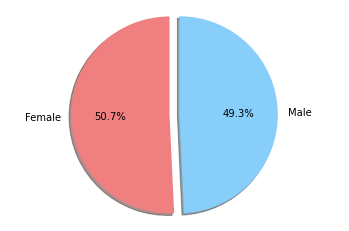

In [10]:
#Pie Chart Using Pyplot for All Shelter Information by Gender

colors = ["lightcoral","lightskyblue"]

labels = true_mf2.index
sizes = true_mf2.values
explode = (0.1,0)

#Create Pie Chart Using the Above Data

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# Create axes which are equal so we have a perfect circle

plt.axis("equal")
plt.show()

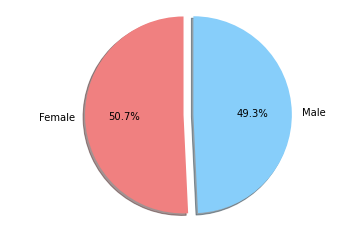

In [12]:
#Pie Chart Using Pandas for All Shelter Information by Gender
colors = ["lightcoral", "lightskyblue"]
explode = [0.1, 0]
true_mf2.plot(kind="pie",shadow = True, colors=colors, explode = explode, startangle=90,figsize=(6,4), autopct='%1.1f%%')
plt.ylabel(" ")
plt.axis("equal")
plt.show()


In [13]:
#Sort All Shelter Information by Dog Size
true_size1 = pet_data.loc[:, "size"]
true_size2 = true_size1.value_counts()
true_size2

Medium    399
Small     185
Large      84
Name: size, dtype: int64

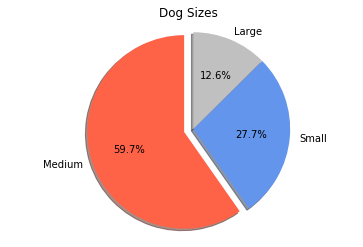

In [14]:
#Pie Chart Using Pandas for All Shelter Information by Size
colors = ["tomato","cornflowerblue","silver"]
explode = [0.1, 0,0]
true_size2.plot(kind="pie",shadow = True, colors = colors, explode = explode, startangle=90,figsize=(6,4), autopct='%1.1f%%')
plt.title("Dog Sizes")
plt.ylabel(" ")
plt.axis("equal")

plt.show()

In [15]:
true_age1 = pet_data.loc[:, "age"]
true_age2 = true_age1.value_counts()
true_age2

Baby      404
Young     229
Adult      32
Senior      3
Name: age, dtype: int64

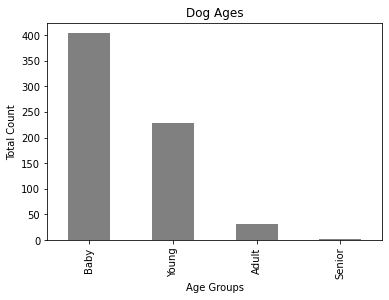

In [16]:
#Pie Chart Using Pandas for All Shelter Information by Size
colors = ["tomato","cornflowerblue","silver","gold"]

y_axis = true_age2.values
x_axis = true_age2.index

#Outline the graph
true_age2.plot(kind="bar", facecolor='grey')

#Assemble the graph
plt.xticks(rotation = 90)
plt.title("Dog Ages")
plt.xlabel("Age Groups")
plt.ylabel("Total Count")

plt.show()


In [17]:
# First create a dataframe grouping by the Breed Column
dog_breeds_data = pet_data.groupby("breeds.primary")

dog_breeds_count = dog_breeds_data["breeds.primary"].count()

breed_summary = pd.DataFrame({"Count": dog_breeds_count})

breed_summary.sort_values(["Count"], ascending = False)

,Count
breeds.primary,
Chihuahua,77
Labrador Retriever,68
Collie,45
Great Pyrenees,42
Dachshund,36
Hound,33
Shepherd,30
Australian Cattle Dog / Blue Heeler,29
Border Collie,29


In [18]:
dog_breeds_count.max()

77

In [19]:
# First create a dataframe grouping by the Breed Column
dogs_status = pet_data.groupby("status")

dogs_status_count = dogs_status["status"].size()

status_summary = pd.DataFrame({"Status": dogs_status_count})


status_summary


,Status
status,
adoptable,7
adopted,661


In [20]:
#Group by breed
breed_count = pet_data.groupby(["status","breeds.primary"]).size()

breed_status_summary = pd.DataFrame({"Count": breed_count})

breed_status_summary.sort_values(["status","Count"], ascending = False)

Count
status    breeds.primary           
adopted   Chihuahua              77
          Labrador Retriever     68
          Collie                 44
          Great Pyrenees         41
          Dachshund              36
...                             ...
adoptable Collie                  1
          Great Pyrenees          1
          Hound                   1
          Shepherd                1
          Terrier                 1

[66 rows x 1 columns]

In [25]:
# Count of Spayed vs Neutered
fixed_status = pet_data.groupby("attributes.spayed_neutered")

fixed_status_count = pd.DataFrame(fixed_status["attributes.spayed_neutered"].count())

fixed_status_count

,attributes.spayed_neutered
attributes.spayed_neutered,
False,4
True,664


In [26]:
#Fixed by Status
group_fixed = pet_data.groupby(["status","attributes.spayed_neutered"]).size()


group_fixed_summary = pd.DataFrame({"Count": group_fixed})

group_fixed_summary.sort_values(["status","Count"], ascending = False)

Count
status    attributes.spayed_neutered       
adopted   True                          657
          False                           4
adoptable True                            7

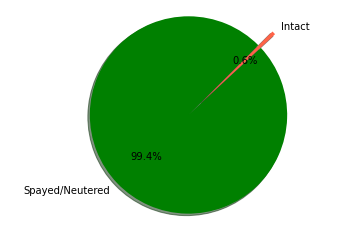

In [28]:
colors = ["green", "tomato"]
explode = [0, 0.2]

labels = ['Spayed/Neutered', 'Intact']
true_spayed2.plot(kind="pie",shadow = True, colors=colors, labels = labels, explode = explode, startangle=45,figsize=(6,4), autopct='%1.1f%%')
#plt.title("Spayed/Neuter vs Intact")
plt.ylabel(" ")
plt.axis("equal")

plt.show()

In [35]:
#Age Overall
age_data = pet_data.groupby("age").size()

age_summary = pd.DataFrame({"Count": age_data})

age_summary.sort_values(["Count"], ascending = False)

,Count
age,
Baby,404
Young,229
Adult,32
Senior,3


In [38]:
#Age by Status
group_age = pet_data.groupby(["age","status"]).size()


group_age_summary = pd.DataFrame({"Count": group_age})

group_age_summary.sort_values(["age","status","Count"], ascending = False)



Count
age    status          
Young  adopted      224
       adoptable      5
Senior adopted        3
Baby   adopted      402
       adoptable      2
Adult  adopted       32

In [43]:
#Size Overall
size_data = pet_data.groupby("size").size()

size_summary = pd.DataFrame({"Count": size_data})

size_summary.sort_values(["size","Count"], ascending = False)


,Count
size,
Small,185
Medium,399
Large,84


In [44]:
#Size by Status
group_size = pet_data.groupby(["size","status"]).size()


group_size_summary = pd.DataFrame({"Count": group_size})

group_size_summary.sort_values(["size","status","Count"], ascending = False)


Count
size   status          
Small  adopted      185
Medium adopted      395
       adoptable      4
Large  adopted       81
       adoptable      3